### Ejercicio de Boston House Price

El grupo:
Elena, Mikel, Daniel, Rodrigo y Américo

### Step 1 importamos los paquetes

In [2]:
# pip install ipywidgets
# pip install geocoder
# pip install geopy
#!pip install vega_datasets 
#!pip install plotly
#!pip install wordcloud
#!pip install nbformat>5 
#!pip install folium

In [10]:
# Importamos todos los paquetes que vayamos a necesitar

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import folium 
import geocoder # pip install geocoder
from wordcloud import WordCloud
from vega_datasets import data as vds # pip install vega_datasets 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)




Os dejamos en el apartado de datos de Teoría información sobre la vivienda en Boston. Un conjunto de datos con los siguientes campos informados:

    1. CRIM     Crimen per cápita por ciudad
    2. ZN       Proporción de zona marcada como residencial para espacios superiores 25,000 sq.ft.
    3. INDUS    Proporción de acres comerciales no minoristas por ciudad
    4. CHAS     Variable Charles River dummy (= 1 si el trazado limita con el río; 0 otro)
    5. NOX      Concentración de óxidos nítricos (partes por 10 millones)
    6. RM       Número medio de habitaciones por vivienda
    7. AGE      Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
    8. DIS      Distancias ponderadas a cinco centros de empleo de Boston
    9. RAD      Índice de accesibilidad a las autopistas radiales
    10. TAX      Tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
    11. PTRATIO  Ratio alumnos-profesor por ciudad
    12. B        1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
    13. LSTAT    % estatus inferior de la población
    14. PRICE    Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

### Step 2 tomaremos el fichero en (ruta)

In [13]:
#data = pd.read_csv('./data/boston_house_prices.csv')
data = pd.read_csv('/data/boston_cvs_daniel.csv', delimiter=';', decimal=',')

data

FileNotFoundError: [Errno 2] No such file or directory: '/data/boston_cvs_daniel.csv'

### Step 3. Veamos los tipos de datos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    object 
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    object 
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    object 
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
 14  TOWN     506 non-null    object 
 15  TOWN#    506 non-null    int64  
 16  TRACT    506 non-null    int64  
 17  LAT      506 non-null    float64
 18  LON      506 non-null    float64
dtypes: float64(10), int64(5), object(4)
memory usage: 75.2+ KB


### Step 4. Cread un dataframe con la información de abajo

In [ ]:
df_boston = pd.DataFrame(data)

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,TOWN,TOWN#,TRACT,LAT,LON
0,"0,00632",18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,396.90,4.98,24.0,Nahant,0,2011,42.2550,-70.955
1,"0,02731",0.0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6,Swampscott,1,2021,42.2875,-70.950
2,"0,02729",0.0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7,Swampscott,1,2022,42.2830,-70.936
3,"0,03237",0.0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4,Marblehead,2,2031,42.2930,-70.928
4,"0,06905",0.0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2,Marblehead,2,2032,42.2980,-70.922


### Step 5. Buscad valores faltantes

In [ ]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
TOWN       0
TOWN#      0
TRACT      0
LAT        0
LON        0
dtype: int64

In [ ]:
import folium
import pandas as pd

map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Add points to the map
for idx, row in df_boston.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LON']],
        popup=row['TOWN'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_boston)

# Save the map to an HTML file
map_boston.save('./html/boston_map.html')

# Display the map
map_boston

In [ ]:
# Load the GeoJSON file
file_path_geojson = './data/boston.geojson'
geojson_data = None
with open(file_path_geojson, 'r') as file:
    geojson_data = file.read()

# Create a map centered around Boston
map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Add GeoJSON data to the map
folium.GeoJson(geojson_data, name="geojson").add_to(map_boston)

# Add circles to the map
for idx, row in df_boston.iterrows():
    folium.Circle(
        location=[row['LAT'], row['LON']],
        radius=100,  # Radius of the circle in meters
        color='blue',
        fill=True,
        fill_color='blue',
        popup=row['TOWN']
    ).add_to(map_boston)

# Save the map to an HTML file
map_boston.save('./html/boston_map_with_geojson_circles.html')

# Display the map
map_boston


In [ ]:
import plotly.express as px

# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    df_boston,
    lat='LAT',
    lon='LON',
    hover_name='TOWN',
    zoom=10,
    height=600
)

fig.update_layout(mapbox_style='open-street-map')
fig.show()


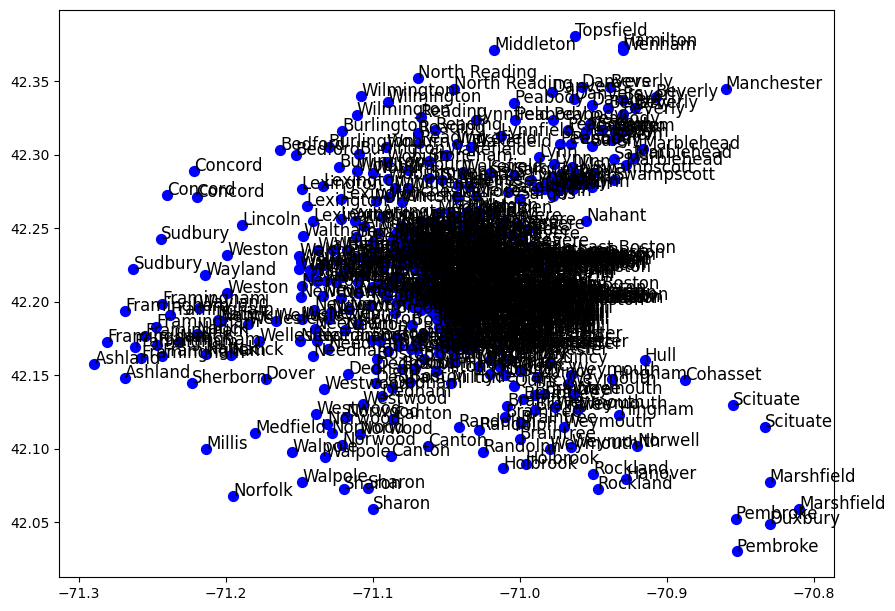

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df_boston['LON'], df_boston['LAT'])]
gdf_boston = gpd.GeoDataFrame(df_boston, geometry=geometry)

# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
gdf_boston.plot(ax=ax, color='blue', markersize=50)
for x, y, label in zip(gdf_boston.geometry.x, gdf_boston.geometry.y, gdf_boston['TOWN']):
    ax.text(x, y, label, fontsize=12)
plt.show()

In [9]:
# Create a map centered around Boston
map_folium = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Add circles to the map
for idx, row in df_boston.iterrows():
    folium.Circle(
        location=[row['LAT'], row['LON']],
        radius=100,  # Radius of the circle in meters
        color='blue',
        fill=True,
        fill_color='blue',
        popup=row['TOWN']
    ).add_to(map_folium)

# Save the map to an HTML file
map_folium.save('./html/boston_map_folium.html')

# Display the map
map_folium

NameError: name 'df_boston' is not defined

In [ ]:
# Group by 'TOWN' and list all 'LAT' and 'LON'
grouped_df = df_boston.groupby('TOWN').agg({'LAT': list, 'LON': list}).reset_index()

grouped_df.head()

,TOWN,LAT,LON
0,Arlington,"[42.2416, 42.245, 42.2475, 42.2575, 42.255, 42...","[-71.087, -71.0855, -71.0833, -71.094, -71.112..."
1,Ashland,"[42.1575, 42.1482]","[-71.2895, -71.269]"
2,Bedford,"[42.3, 42.303]","[-71.1525, -71.1633]"
3,Belmont,"[42.2408, 42.2345, 42.2282, 42.2287, 42.23, 42...","[-71.1, -71.0995, -71.0966, -71.1005, -71.1065..."
4,Beverly,"[42.346, 42.332, 42.337, 42.3275, 42.332, 42.339]","[-70.9385, -70.94, -70.93, -70.93, -70.9215, -..."


In [ ]:
# Calculate the bounding box for the area
min_lat = df_boston['LAT'].min()
max_lat = df_boston['LAT'].max()
min_lon = df_boston['LON'].min()
max_lon = df_boston['LON'].max()

bounding_box = {
    'min_lat': min_lat,
    'max_lat': max_lat,
    'min_lon': min_lon,
    'max_lon': max_lon
}

print(bounding_box)

{'min_lat': 42.03, 'max_lat': 42.381, 'min_lon': -71.2895, 'max_lon': -70.81}


In [8]:
# map
map_geojson = folium.Map(location=[42.3601, -71.0589], zoom_start=7)

# add geojson file to map
folium.GeoJson('/data/Boston_Housing_1970.geojson', name='geojson indiana').add_to(map_geojson)

# # add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_geojson)

# display map
map_geojson

FileNotFoundError: [Errno 2] No such file or directory: '/data/Boston_Housing_1970.geojson'